<a href="https://colab.research.google.com/github/nishitha-ogey/nyc_taxi_trip_duration/blob/main/221FA14105_T3_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




      id              vendor_id     pickup_datetime                 
 Length:729322      Min.   :1.000   Min.   :2016-01-01 00:01:14.00  
 Class :character   1st Qu.:1.000   1st Qu.:2016-02-17 18:46:36.25  
 Mode  :character   Median :2.000   Median :2016-04-01 17:30:37.50  
                    Mean   :1.535   Mean   :2016-04-01 11:17:42.11  
                    3rd Qu.:2.000   3rd Qu.:2016-05-15 07:13:01.25  
                    Max.   :2.000   Max.   :2016-06-30 23:59:37.00  
 dropoff_datetime                 passenger_count pickup_longitude 
 Min.   :2016-01-01 00:05:54.00   Min.   :0.000   Min.   :-121.93  
 1st Qu.:2016-02-17 19:00:30.50   1st Qu.:1.000   1st Qu.: -73.99  
 Median :2016-04-01 17:46:47.50   Median :1.000   Median : -73.98  
 Mean   :2016-04-01 11:33:34.34   Mean   :1.662   Mean   : -73.97  
 3rd Qu.:2016-05-15 07:38:40.50   3rd Qu.:2.000   3rd Qu.: -73.97  
 Max.   :2016-07-01 23:02:03.00   Max.   :9.000   Max.   : -65.90  
 pickup_latitude dropoff_longitude dropof

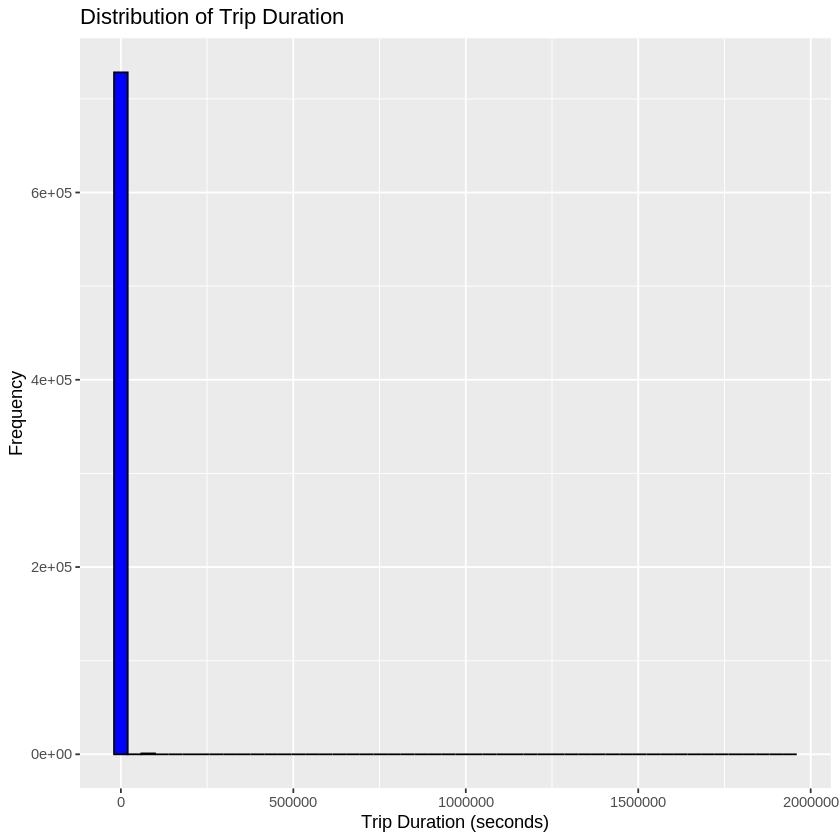

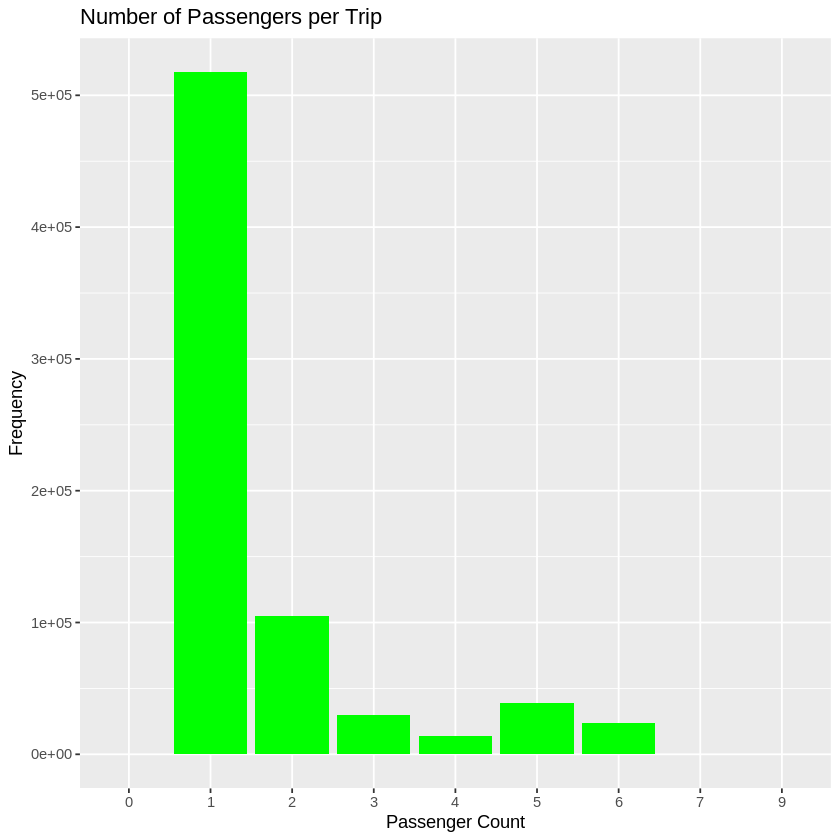

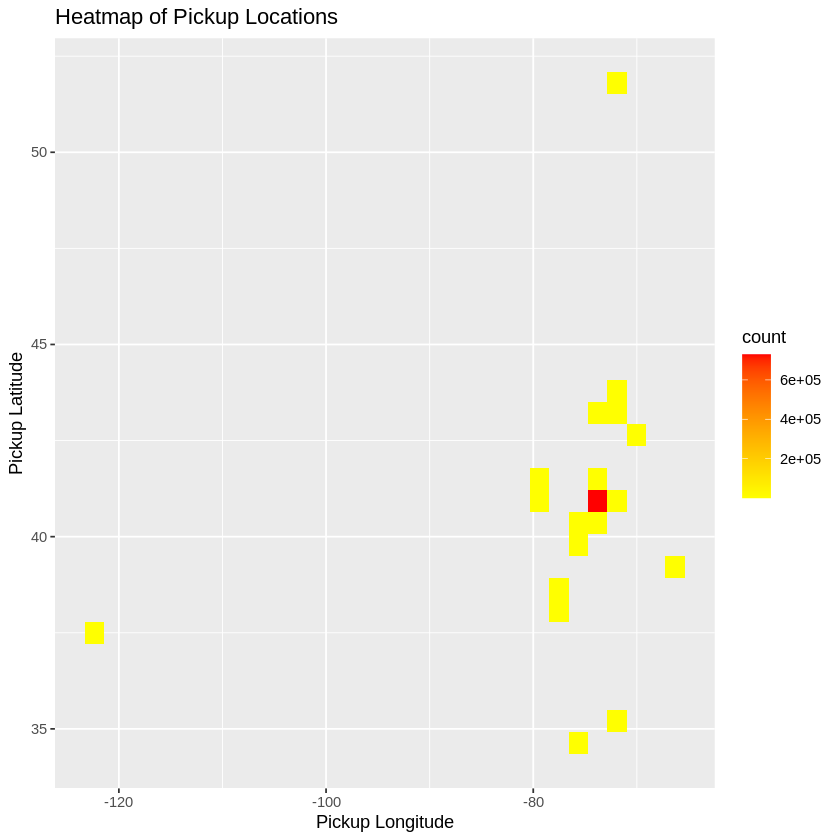


Call:
lm(formula = trip_duration ~ passenger_count, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
  -1138    -555    -288     124 1938809 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      888.498      7.301  121.69   <2e-16 ***
passenger_count   38.345      3.448   11.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3864 on 729320 degrees of freedom
Multiple R-squared:  0.0001696,	Adjusted R-squared:  0.0001682 
F-statistic: 123.7 on 1 and 729320 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


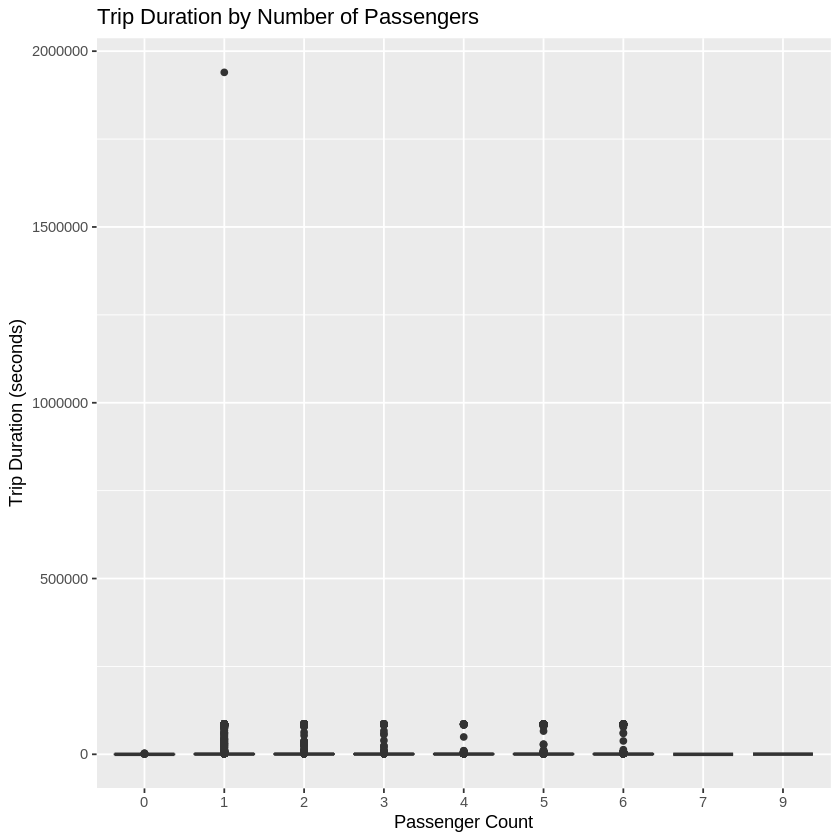


Call:
lm(formula = trip_duration ~ pickup_latitude + pickup_longitude, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
 -29564    -528    -267     129 1937910 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      341275.34    7459.34   45.75   <2e-16 ***
pickup_latitude   -4594.93     134.67  -34.12   <2e-16 ***
pickup_longitude   2069.33      64.86   31.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3859 on 729319 degrees of freedom
Multiple R-squared:  0.002848,	Adjusted R-squared:  0.002846 
F-statistic:  1042 on 2 and 729319 DF,  p-value: < 2.2e-16


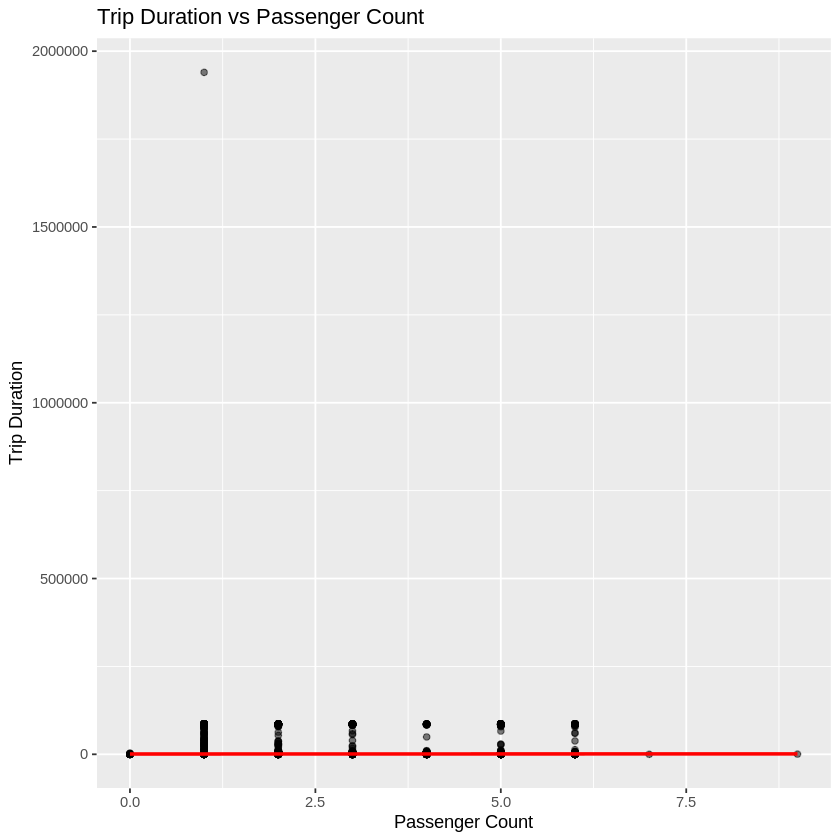

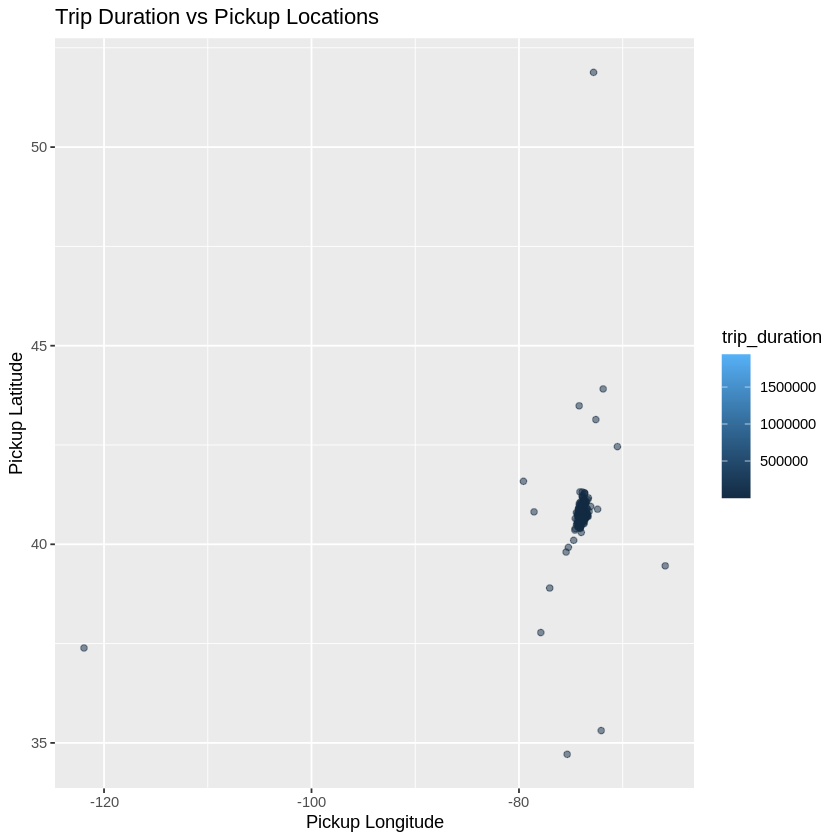

In [ ]:
# Load required libraries
library(ggplot2)
library(dplyr)
library(lubridate)

# Load the dataset
data <- read.csv("/content/nyc_taxi_trip_duration.csv")

# Convert datetime columns to proper format
data$pickup_datetime <- as.POSIXct(data$pickup_datetime, format="%Y-%m-%d %H:%M:%S")
data$dropoff_datetime <- as.POSIXct(data$dropoff_datetime, format="%Y-%m-%d %H:%M:%S")

# 1. EDA: Summary of the dataset
summary(data)

# 2. EDA: Distribution of trip duration
ggplot(data, aes(x = trip_duration)) +
  geom_histogram(bins = 50, fill = "blue", color = "black") +
  labs(title = "Distribution of Trip Duration", x = "Trip Duration (seconds)", y = "Frequency")

# 3. EDA: Number of passengers per trip
ggplot(data, aes(x = factor(passenger_count))) +
  geom_bar(fill = "green") +
  labs(title = "Number of Passengers per Trip", x = "Passenger Count", y = "Frequency")

# 4. EDA: Pickup location heatmap (longitude vs latitude)
ggplot(data, aes(x = pickup_longitude, y = pickup_latitude)) +
  geom_bin2d() +
  scale_fill_gradient(low = "yellow", high = "red") +
  labs(title = "Heatmap of Pickup Locations", x = "Pickup Longitude", y = "Pickup Latitude")

# 5. EDA: Boxplot of trip duration by number of passengers
ggplot(data, aes(x = factor(passenger_count), y = trip_duration)) +
  geom_boxplot(fill = "purple") +
  labs(title = "Trip Duration by Number of Passengers", x = "Passenger Count", y = "Trip Duration (seconds)")

# Linear Regression

# 1. Simple linear regression: Trip duration vs. passenger count
model1 <- lm(trip_duration ~ passenger_count, data = data)
summary(model1)

# Scatter plot with regression line
ggplot(data, aes(x = passenger_count, y = trip_duration)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", col = "red") +
  labs(title = "Trip Duration vs Passenger Count", x = "Passenger Count", y = "Trip Duration")

# 2. Linear regression: Trip duration vs. pickup latitude and longitude
model2 <- lm(trip_duration ~ pickup_latitude + pickup_longitude, data = data)
summary(model2)

# Scatter plot for pickup locations with trip duration
ggplot(data, aes(x = pickup_longitude, y = pickup_latitude, color = trip_duration)) +
  geom_point(alpha = 0.5) +
  labs(title = "Trip Duration vs Pickup Locations", x = "Pickup Longitude", y = "Pickup Latitude")



Call:
lm(formula = trip_duration ~ passenger_count + pickup_longitude + 
    pickup_latitude + dropoff_longitude + dropoff_latitude + 
    pickup_hour + dropoff_hour, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
 -34375    -524    -262     134 1938010 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.745e+05  8.600e+03  43.544  < 2e-16 ***
passenger_count    3.748e+01  3.443e+00  10.886  < 2e-16 ***
pickup_longitude   2.528e+03  1.041e+02  24.274  < 2e-16 ***
pickup_latitude   -3.551e+03  1.541e+02 -23.045  < 2e-16 ***
dropoff_longitude -4.744e+02  1.050e+02  -4.517 6.26e-06 ***
dropoff_latitude  -1.890e+03  1.438e+02 -13.143  < 2e-16 ***
pickup_hour       -4.749e-01  1.984e+00  -0.239    0.811    
dropoff_hour       2.273e+00  1.959e+00   1.160    0.246    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3858 on 729314 degrees of freedom
Multiple R-squared:  0.003292,	Adj

`geom_smooth()` using formula = 'y ~ x'


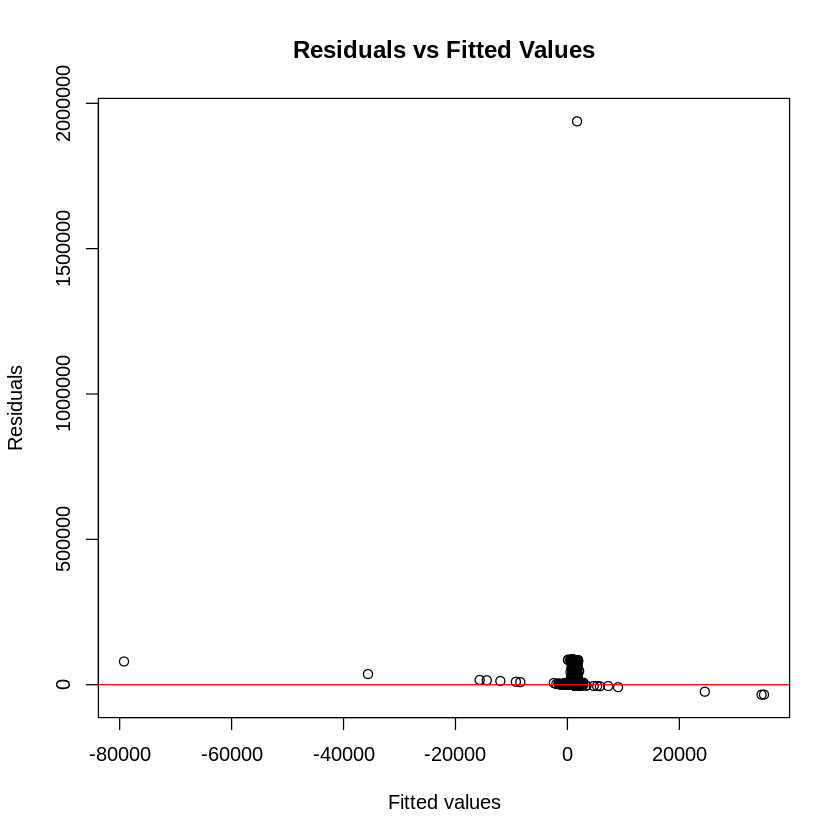

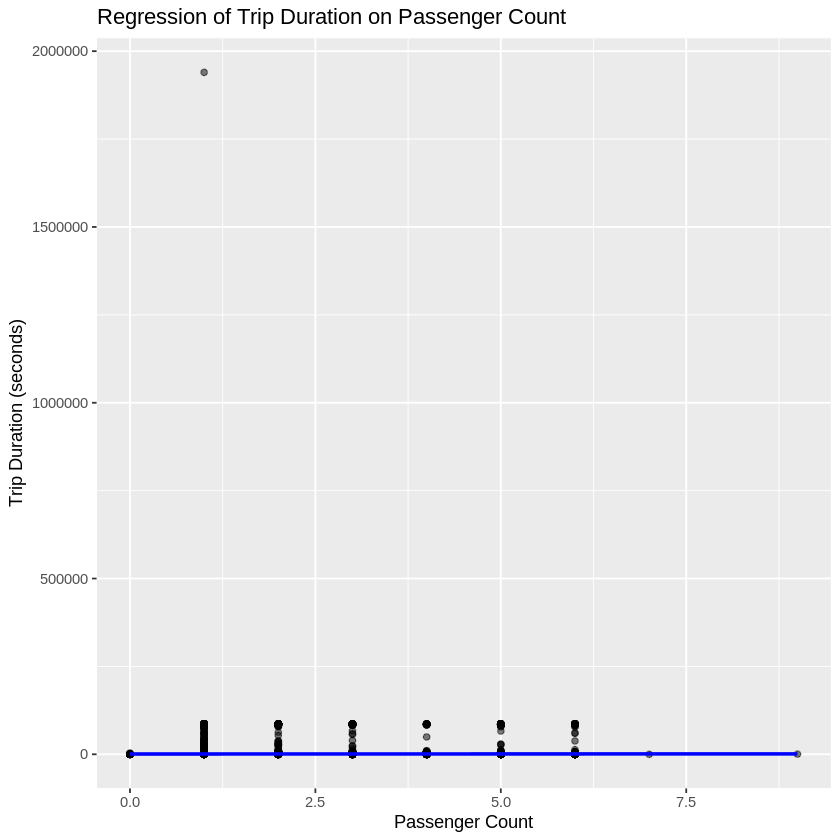

In [ ]:
# Load necessary libraries
library(dplyr)

# Load the dataset
data <- read.csv("/content/nyc_taxi_trip_duration.csv")

# Convert datetime columns to proper format
data$pickup_datetime <- as.POSIXct(data$pickup_datetime, format="%Y-%m-%d %H:%M:%S")
data$dropoff_datetime <- as.POSIXct(data$dropoff_datetime, format="%Y-%m-%d %H:%M:%S")

# Create new features: pickup and dropoff hour
data$pickup_hour <- as.numeric(format(data$pickup_datetime, "%H"))
data$dropoff_hour <- as.numeric(format(data$dropoff_datetime, "%H"))

# Linear regression model using multiple independent variables
model <- lm(trip_duration ~ passenger_count + pickup_longitude + pickup_latitude +
            dropoff_longitude + dropoff_latitude + pickup_hour + dropoff_hour, data = data)

# Summary of the regression model
summary(model)

# Plotting residuals vs fitted values to check for model assumptions
plot(model$fitted.values, model$residuals,
     xlab = "Fitted values", ylab = "Residuals",
     main = "Residuals vs Fitted Values")
abline(h = 0, col = "red")

# Plotting the regression line for one independent variable (for visualization purposes)
ggplot(data, aes(x = passenger_count, y = trip_duration)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", col = "blue") +
  labs(title = "Regression of Trip Duration on Passenger Count",
       x = "Passenger Count", y = "Trip Duration (seconds)")


In [ ]:
install.packages('Metrics')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

# Load necessary libraries
library(dplyr)  # Load the dplyr package

# Load the dataset
data <- read.csv('nyc_taxi_trip_duration.csv')

# Inspect the dataset to identify suitable features and the target variable
str(data)

# Assuming 'trip_duration' is the target variable and selecting some independent variables for the model
# Modify the selected independent variables as per your dataset
model_data <- data %>%
  select(trip_duration, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)

# Fit the linear regression model
model <- lm(trip_duration ~ ., data = model_data)

# Predict the values
predictions <- predict(model, newdata = model_data)

# Calculate RMSE
rmse_value <- rmse(model_data$trip_duration, predictions)

# Calculate R²
r_squared <- summary(model)$r.squared

# Print RMSE and R²
cat("RMSE:", rmse_value, "\n")
cat("R-squared:", r_squared, "\n")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




'data.frame':	729322 obs. of  11 variables:
 $ id                : chr  "id1080784" "id0889885" "id0857912" "id3744273" ...
 $ vendor_id         : int  2 1 2 2 1 2 1 2 2 1 ...
 $ pickup_datetime   : chr  "2016-02-29 16:40:21" "2016-03-11 23:35:37" "2016-02-21 17:59:33" "2016-01-05 09:44:31" ...
 $ dropoff_datetime  : chr  "2016-02-29 16:47:01" "2016-03-11 23:53:57" "2016-02-21 18:26:48" "2016-01-05 10:03:32" ...
 $ passenger_count   : int  1 2 2 6 1 2 1 1 2 1 ...
 $ pickup_longitude  : num  -74 -74 -74 -74 -74 ...
 $ pickup_latitude   : num  40.8 40.7 40.7 40.8 40.7 ...
 $ dropoff_longitude : num  -74 -74 -73.9 -74 -74 ...
 $ dropoff_latitude  : num  40.8 40.7 40.8 40.8 40.7 ...
 $ store_and_fwd_flag: chr  "N" "N" "N" "N" ...
 $ trip_duration     : int  400 1100 1635 1141 848 1455 397 1101 1886 1429 ...
RMSE: 3858.59 
R-squared: 0.003119816 
